In [28]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
color_dict = {"genot_quad": "#317d01",
    "genot_lin": "#a4fa6e",
    "id": "#8f97a8",
             }

In [6]:
genot_quad_dir = "/lustre/groups/ml01/workspace/ot_perturbation/data/multiome/results/genot_quad"
id_dir = "/lustre/groups/ml01/workspace/ot_perturbation/data/multiome/results/identity"
genot_lin_dir = "/lustre/groups/ml01/workspace/ot_perturbation/data/multiome/results/genot_lin"

In [7]:
model_dirs = {"id": id_dir, "genot_lin": genot_lin_dir, "genot_quad": genot_quad_dir, }

# Encoded

In [8]:
metrics_file = "metrics_encoded.csv"
dfs = {}
for model, model_dir in model_dirs.items():
    dfs[model] = pd.read_csv(os.path.join(model_dir, metrics_file), index_col=0)
    dfs[model].loc["sinkhorn_div"] = dfs[model].loc[["sinkhorn_div_1", "sinkhorn_div_10", "sinkhorn_div_100"]].mean(axis=0)
    dfs[model] = dfs[model].drop(["sinkhorn_div_1", "sinkhorn_div_10", "sinkhorn_div_100"])
    dfs[model]["model"] = model

In [9]:
result_df = pd.concat(dfs.values(), ignore_index=False)
result_df["metric"] = result_df.index
metrics = result_df["metric"].unique()
df2 = pd.melt(result_df, id_vars=["model", "metric"])

/tmp/ipykernel_21749/867311123.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_21749/867311123.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_21749/867311123.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_21749/867311123.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)


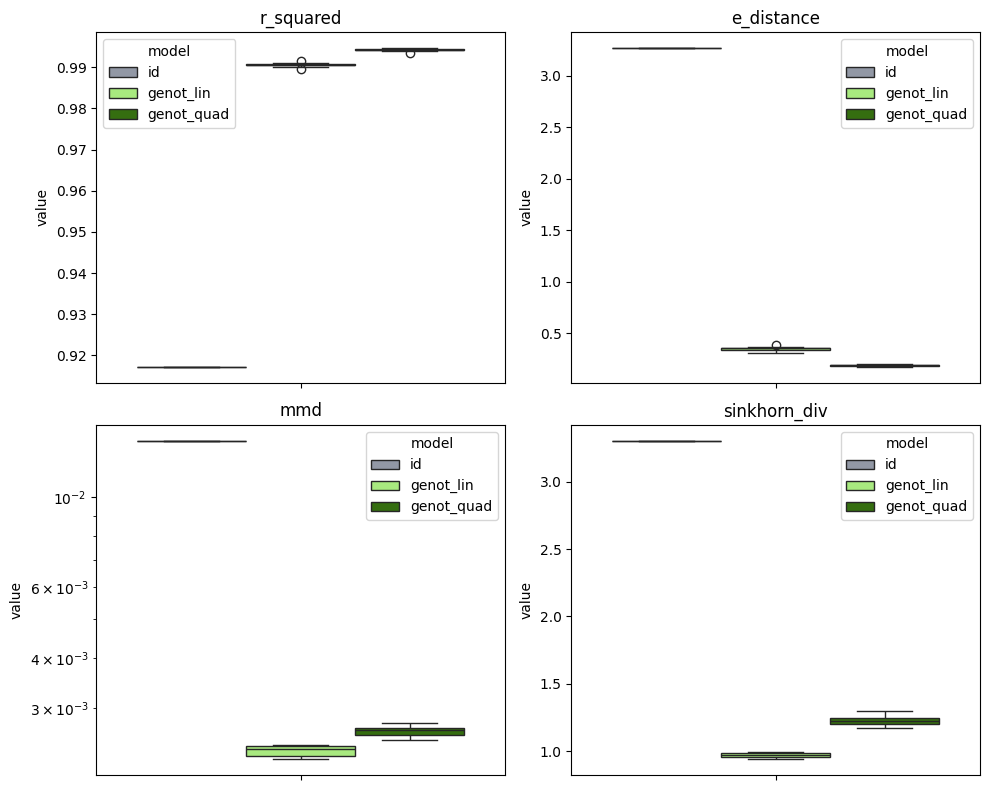

In [10]:
k = len(metrics)

fig, axes = plt.subplots(nrows=int(np.ceil(k / 2)), ncols=2, figsize=(10, 8))  # Adjust layout format
axes = axes.flatten()  # Flatten if more than one row

# Loop through categories and plot each as a barplot
for i, metric in enumerate(metrics):
    # Filter the DataFrame
    subset = df2[df2["metric"] == metric]
    if metric == "mmd":
        axes[i].set_yscale("log")
    # Create the barplot
    sns.boxplot(subset, y="value", hue="model", ax=axes[i], palette=color_dict)
    axes[i].set_title(f"{metric}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipykernel_21749/617541430.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(subset, x="model", y="value", ax=axes[i],  palette=color_dict, errorbar="sd")
/tmp/ipykernel_21749/617541430.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_21749/617541430.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(subset, x="model", y="value", ax=axes[i],  palette=color_dict, errorbar="sd")
/tmp/ipykernel_21749/617541430.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() o

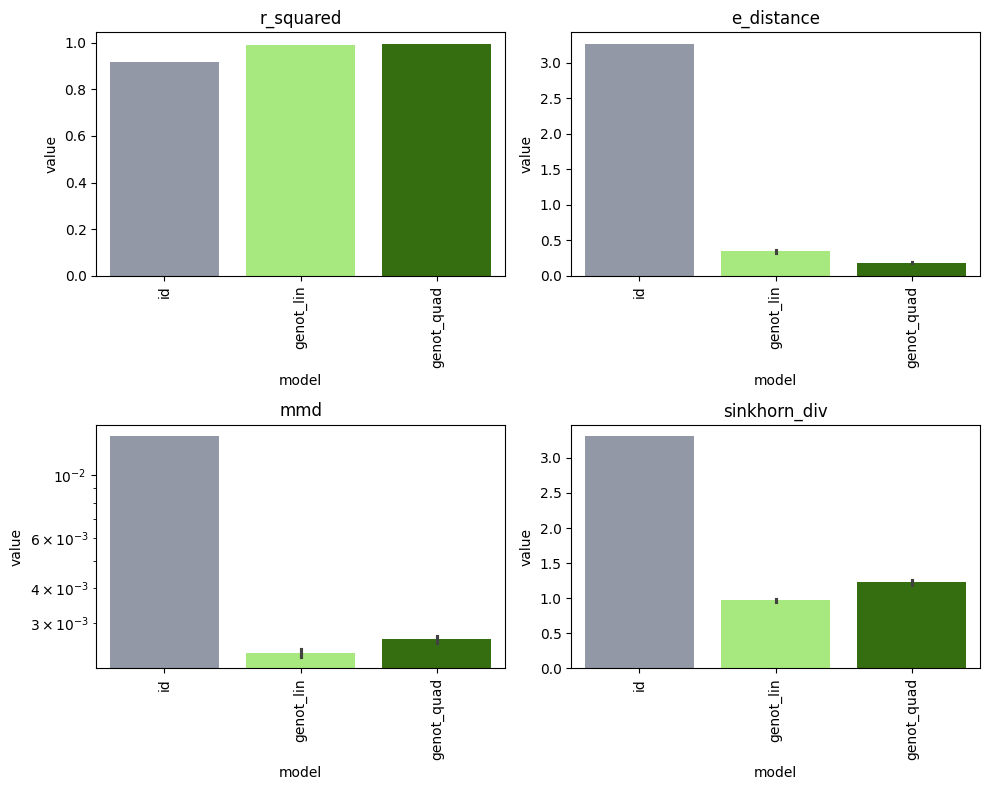

In [11]:
k = len(metrics)

fig, axes = plt.subplots(nrows=int(np.ceil(k / 2)), ncols=2, figsize=(10, 8))  # Adjust layout format
axes = axes.flatten()  # Flatten if more than one row

# Loop through categories and plot each as a barplot
for i, metric in enumerate(metrics):
    # Filter the DataFrame
    subset = df2[df2["metric"] == metric]
    # Create the barplot
    sns.barplot(subset, x="model", y="value", ax=axes[i],  palette=color_dict, errorbar="sd")
    if metric == "mmd":
        axes[i].set_yscale("log")
    axes[i].set_title(f"{metric}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()